# Credit Card Fraud Detection

###### Ideas:
1. Loading the dataset
2. Checking the target classes
3. Set target attribute & Split data into traing and test
4. Resampling: Under-Sample
#4.a Logistic Regression w/o gridsearchcv
#4.b Decision Tree
#4.c Random Forest
5. Resampling: Over-sample
#5.a Logistic Regression
#5.b Decision Tree
#5.c Random Forest
6. Whole Data
#6.a Logistic Regression
#6.b Decision Tree
#6.c Random Forest
7. Bagging on Three Datasets


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1.Loading the dataset

In [2]:
data = pd.read_csv("C:/Users/JoyWa/Desktop/CSC529/Project/data/creditcard.csv")
print data.shape
data.head(3)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


## 2. Checking the target classes

In [3]:
count_classes = pd.value_counts(data['Class']).sort_index()
count_classes

0    284315
1       492
Name: Class, dtype: int64

## 3. Set target attribute & Split data into traing and test

In [4]:
X = data.drop(['Time','Class'],axis=1)
y = data.ix[:, data.columns == 'Class']
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 33)
print "Number of transactions train dataset: ", len(X_train)
print "Number of transactions test dataset: ", len(X_test)
print "Total number of transactions: ", len(X_train)+len(X_test)

C:\Users\JoyWa\.anaconda\2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Number of transactions train dataset:  199364
Number of transactions test dataset:  85443
Total number of transactions:  284807


C:\Users\JoyWa\.anaconda\2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
number_records_fraud = len(y_train[y_train.Class == 1])
print number_records_fraud
number_records_normal = len(y_train[y_train.Class == 0])
print number_records_normal

341
199023


## 4. Resampling: Under-Sample

In [6]:
from imblearn.under_sampling import RandomUnderSampler

In [7]:
rus = RandomUnderSampler(random_state=33)
X_train_undersample, y_train_undersample = rus.fit_sample(X_train,y_train)
print X_train_undersample.shape
print y_train_undersample.shape

(682L, 29L)
(682L,)


C:\Users\JoyWa\.anaconda\2\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
count_classes = pd.value_counts(y_test['Class']).sort_index()
count_classes

0    85292
1      151
Name: Class, dtype: int64

### 4.a Logistic Regression  - Recall

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report 

no gridsearchcv

In [10]:
lrclf = LogisticRegression()
lrclf = lrclf.fit(X_train_undersample,y_train_undersample)
train_under_p = lrclf.predict(X_train_undersample)
print classification_report(y_train_undersample, train_under_p)
test_under_p = lrclf.predict(X_test)
print classification_report(y_test, test_under_p) 

             precision    recall  f1-score   support

          0       0.93      0.97      0.95       341
          1       0.97      0.93      0.95       341

avg / total       0.95      0.95      0.95       682

             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85292
          1       0.04      0.89      0.08       151

avg / total       1.00      0.96      0.98     85443



gridsearchcv

In [14]:
param_grid = {'penalty':['l1','l2'],'C':[0.01,0.1,1,10,100]}
lrclf = GridSearchCV(LogisticRegression(), param_grid,cv=5)
lrclf = lrclf.fit(X_train_undersample,y_train_undersample)
lrclf.best_params_

{'C': 1, 'penalty': 'l2'}

In [16]:
lrclf = LogisticRegression(C=1,penalty='l2')
lrclf = lrclf.fit(X_train_undersample,y_train_undersample)
train_under_p = lrclf.predict(X_train_undersample)
print classification_report(y_train_undersample, train_under_p)
test_under_p = lrclf.predict(X_test)
print classification_report(y_test, test_under_p) 

             precision    recall  f1-score   support

          0       0.93      0.97      0.95       341
          1       0.97      0.93      0.95       341

avg / total       0.95      0.95      0.95       682

             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85292
          1       0.04      0.89      0.08       151

avg / total       1.00      0.96      0.98     85443



In [17]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

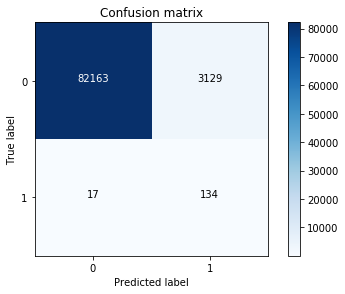

In [18]:
cnf_matrix = confusion_matrix(y_test,test_under_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

### 4.b Decision Tree

no gridserchcv

In [19]:
treeclf = DecisionTreeClassifier()
treeclf = treeclf.fit(X_train_undersample,y_train_undersample)
train_under_p = treeclf.predict(X_train_undersample)
print(classification_report(y_train_undersample, train_under_p))
test_under_p = treeclf.predict(X_test)
print classification_report(y_test, test_under_p) 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       341
          1       1.00      1.00      1.00       341

avg / total       1.00      1.00      1.00       682

             precision    recall  f1-score   support

          0       1.00      0.92      0.96     85292
          1       0.02      0.88      0.04       151

avg / total       1.00      0.92      0.96     85443



gridsearch

In [25]:
param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(2,10), 'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(1,10)}
treeclf = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
treeclf = treeclf.fit(X_train_undersample,y_train_undersample)
treeclf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [26]:
treeclf = DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=1,min_samples_split=4)
treeclf = treeclf.fit(X_train_undersample,y_train_undersample)
train_under_p = treeclf.predict(X_train_undersample)
print(classification_report(y_train_undersample, train_under_p))
test_under_p = treeclf.predict(X_test)
print classification_report(y_test, test_under_p) 

             precision    recall  f1-score   support

          0       0.88      1.00      0.94       341
          1       1.00      0.87      0.93       341

avg / total       0.94      0.93      0.93       682

             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85292
          1       0.19      0.82      0.31       151

avg / total       1.00      0.99      1.00     85443



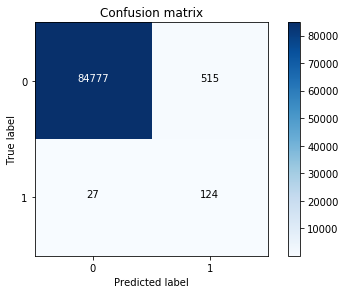

In [27]:
cnf_matrix = confusion_matrix(y_test,test_under_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

## 4.c Random Forest

without gridsearchcv

In [28]:
rfclf = RandomForestClassifier()
rfclf = rfclf.fit(X_train_undersample,y_train_undersample)
train_under_p  = rfclf.predict(X_train_undersample)
print classification_report(y_train_undersample, train_under_p )
test_under_p = rfclf.predict(X_test)
print classification_report(y_test, test_under_p)

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       341
          1       1.00      0.99      0.99       341

avg / total       0.99      0.99      0.99       682

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85292
          1       0.07      0.88      0.12       151

avg / total       1.00      0.98      0.99     85443



with gridserachcv

In [30]:
param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(2,10), 'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(1,10)}
rfclf = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
rfclf = rfclf.fit(X_train_undersample,y_train_undersample)
rfclf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [31]:
rfclf = RandomForestClassifier(criterion='gini', max_depth=5,min_samples_leaf=9,min_samples_split=2)
rfclf = rfclf.fit(X_train_undersample,y_train_undersample)
train_under_p = rfclf.predict(X_train_undersample)
print classification_report(y_train_undersample, train_under_p)
test_under_p = rfclf.predict(X_test)
print classification_report(y_test, test_under_p)

             precision    recall  f1-score   support

          0       0.92      0.99      0.95       341
          1       0.99      0.91      0.95       341

avg / total       0.95      0.95      0.95       682

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85292
          1       0.08      0.87      0.15       151

avg / total       1.00      0.98      0.99     85443



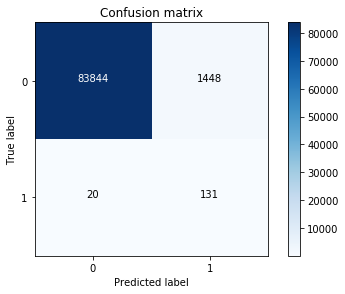

In [32]:
cnf_matrix = confusion_matrix(y_test,test_under_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

# 5. Resampling: Over-sample

In [33]:
from imblearn.over_sampling import SMOTE 

In [34]:
sm = SMOTE(random_state=33,svm_estimator=None)
X_train_oversample, y_train_oversample = sm.fit_sample(X_train,y_train)
print X_train_oversample.shape
print y_train_oversample.shape

(398046L, 29L)
(398046L,)


In [35]:
number_records_fraud = len(y_train_oversample[y_train_oversample == 1])
print number_records_fraud
number_records_normal = len(y_train_oversample[y_train_oversample == 0])
print number_records_normal

199023
199023


## 5.a Logistic Regression

no gridsearchcv

In [36]:
lrclf = LogisticRegression()
lrclf = lrclf.fit(X_train_oversample,y_train_oversample)
train_over_p = lrclf.predict(X_train_oversample)
print classification_report(y_train_oversample, train_over_p)
test_over_p = lrclf.predict(X_test)
print classification_report(y_test, test_over_p) 

             precision    recall  f1-score   support

          0       0.95      0.98      0.97    199023
          1       0.98      0.95      0.97    199023

avg / total       0.97      0.97      0.97    398046

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85292
          1       0.09      0.88      0.16       151

avg / total       1.00      0.98      0.99     85443



gridsearchcv

In [37]:
param_grid = {'penalty':['l1','l2'],'C':[0.01,0.1,1,10,100]}
lrclf = GridSearchCV(LogisticRegression(), param_grid,cv=5)
lrclf = lrclf.fit(X_train_oversample,y_train_oversample)
lrclf.best_params_

{'C': 100, 'penalty': 'l2'}

In [38]:
lrclf = LogisticRegression(penalty='l2' , C= 100)
lrclf = lrclf.fit(X_train_oversample,y_train_oversample)
train_over_p = lrclf.predict(X_train_oversample)
print classification_report(y_train_oversample, train_over_p)
test_over_p = lrclf.predict(X_test)
print classification_report(y_test, test_over_p) 

             precision    recall  f1-score   support

          0       0.95      0.98      0.97    199023
          1       0.98      0.95      0.97    199023

avg / total       0.97      0.97      0.97    398046

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85292
          1       0.09      0.88      0.16       151

avg / total       1.00      0.98      0.99     85443



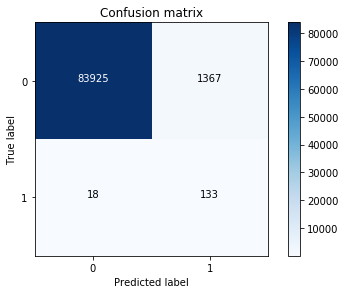

In [39]:
cnf_matrix = confusion_matrix(y_test,test_over_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

## 5.b Decision Tree

without gridsearch

In [40]:
treeclf = DecisionTreeClassifier()
treeclf = treeclf.fit(X_train_oversample,y_train_oversample)
train_over_p = treeclf.predict(X_train_oversample)
print(classification_report(y_train_oversample, train_over_p))
test_over_p = treeclf.predict(X_test)
print classification_report(y_test, test_over_p) 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    199023
          1       1.00      1.00      1.00    199023

avg / total       1.00      1.00      1.00    398046

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85292
          1       0.44      0.77      0.56       151

avg / total       1.00      1.00      1.00     85443



In [45]:
param_grid = {'max_depth': np.arange(2,5), 'min_samples_split':np.arange(2,5),'min_samples_leaf':np.arange(1,5)}
treeclf = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
treeclf = treeclf.fit(X_train_oversample,y_train_oversample)
treeclf.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [46]:
treeclf = DecisionTreeClassifier(max_depth=4,min_samples_leaf=1,min_samples_split=2)
treeclf = treeclf.fit(X_train_oversample,y_train_oversample)
train_over_p = treeclf.predict(X_train_oversample)
print classification_report(y_train_oversample, train_over_p)
test_over_p = treeclf.predict(X_test)
print classification_report(y_test, test_over_p) 

             precision    recall  f1-score   support

          0       0.94      0.98      0.96    199023
          1       0.97      0.94      0.96    199023

avg / total       0.96      0.96      0.96    398046

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85292
          1       0.06      0.88      0.11       151

avg / total       1.00      0.98      0.99     85443



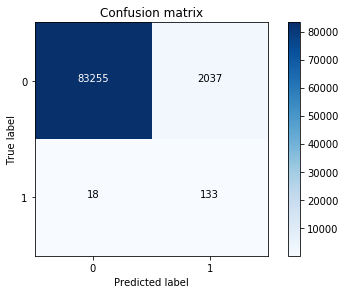

In [47]:
cnf_matrix = confusion_matrix(y_test,test_over_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

## 5.c Random Forest

without gridsearch

In [48]:
rfclf = RandomForestClassifier()
rfclf = rfclf.fit(X_train_oversample,y_train_oversample)
train_p_over = rfclf.predict(X_train_oversample)
print classification_report(y_train_oversample, train_p_over)
test_p_over = rfclf.predict(X_test)
print classification_report(y_test, test_p_over)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    199023
          1       1.00      1.00      1.00    199023

avg / total       1.00      1.00      1.00    398046

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85292
          1       0.91      0.77      0.83       151

avg / total       1.00      1.00      1.00     85443



In [51]:
param_grid = {'max_depth': np.arange(2,5), 'min_samples_split':np.arange(2,5),'min_samples_leaf':np.arange(1,5)}
rfclf = GridSearchCV(RandomForestClassifier(), param_grid,cv=5)
rfclf = rfclf.fit(X_train_oversample,y_train_oversample)
rfclf.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [52]:
rfclf = RandomForestClassifier(max_depth=4,min_samples_leaf=1,min_samples_split=4)
rfclf = rfclf.fit(X_train_oversample,y_train_oversample)
train_p_over = rfclf.predict(X_train_oversample)
print classification_report(y_train_oversample, train_p_over)
test_p_over = rfclf.predict(X_test)
print classification_report(y_test, test_p_over)

             precision    recall  f1-score   support

          0       0.93      0.99      0.96    199023
          1       0.99      0.92      0.95    199023

avg / total       0.96      0.96      0.96    398046

             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85292
          1       0.13      0.85      0.23       151

avg / total       1.00      0.99      0.99     85443



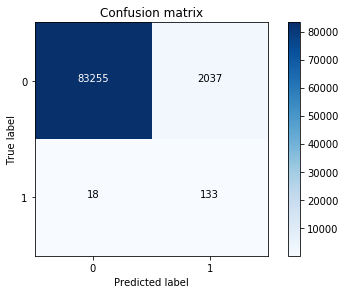

In [53]:
cnf_matrix = confusion_matrix(y_test,test_over_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

# 6. Original data

6.a Logistic Regression

In [70]:
param_grid = {'penalty':['l1','l2'],'C':[0.01,0.1,1,10,100]}
lrclf = GridSearchCV(LogisticRegression(), param_grid,cv=5)
lrclf = lrclf.fit(np.array(X_train),np.ravel(y_train))
lrclf.best_params_

{'C': 10, 'penalty': 'l1'}

In [71]:
lrclf = LogisticRegression(penalty='l1',C=10)
lrclf = lrclf.fit(X_train,y_train)
train_all_p = lrclf.predict(X_train)
print classification_report(y_train, train_all_p)
test_all_p = lrclf.predict(X_test)
print classification_report(y_test, test_all_p) 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    199023
          1       0.90      0.67      0.77       341

avg / total       1.00      1.00      1.00    199364

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85292
          1       0.85      0.62      0.71       151

avg / total       1.00      1.00      1.00     85443



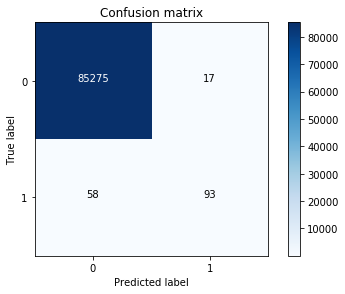

In [72]:
cnf_matrix = confusion_matrix(y_test,test_all_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

6.b Decision Tree

In [74]:
param_grid = {'max_depth': np.arange(2,5), 'min_samples_split':np.arange(2,5),'min_samples_leaf':np.arange(1,5)}
treeclf = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
treeclf = treeclf.fit(np.array(X_train),np.ravel(y_train))
treeclf.best_params_

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [75]:
treeclf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=2)
treeclf = treeclf.fit(X_train,y_train)
train_all_p = treeclf.predict(X_train)
print classification_report(y_train, train_all_p)
test_all_p = treeclf.predict(X_test)
print classification_report(y_test, test_all_p) 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    199023
          1       0.91      0.80      0.85       341

avg / total       1.00      1.00      1.00    199364

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85292
          1       0.84      0.73      0.78       151

avg / total       1.00      1.00      1.00     85443



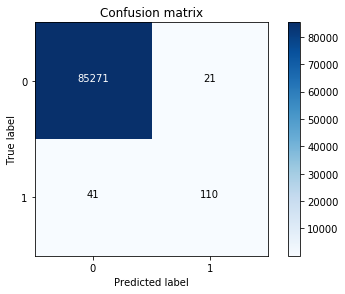

In [76]:
cnf_matrix = confusion_matrix(y_test,test_all_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

6c. random forest

In [66]:
param_grid = {'max_depth': np.arange(2,5), 'min_samples_split':np.arange(2,5),'min_samples_leaf':np.arange(1,5)}
rfclf = GridSearchCV(RandomForestClassifier(), param_grid,cv=5)
rfclf = rfclf.fit(np.array(X_train),np.ravel(y_train))
rfclf.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [67]:
rfclf = RandomForestClassifier(max_depth=4,min_samples_split=2,min_samples_leaf=1)
rfclf = rfclf.fit(X_train,y_train)
train_all_p = rfclf.predict(X_train)
print classification_report(y_train, train_all_p)
test_all_p = rfclf.predict(X_test)
print classification_report(y_test, test_all_p)

C:\Users\JoyWa\.anaconda\2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


             precision    recall  f1-score   support

          0       1.00      1.00      1.00    199023
          1       0.97      0.70      0.81       341

avg / total       1.00      1.00      1.00    199364

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85292
          1       0.93      0.60      0.73       151

avg / total       1.00      1.00      1.00     85443



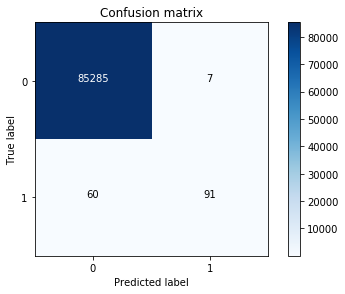

In [68]:
cnf_matrix = confusion_matrix(y_test,test_all_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

# 7. Bagging on Three Datasets

## Under sample

In [77]:
from sklearn.ensemble import BaggingClassifier

In [78]:
bcclf = BaggingClassifier()
bcclf = bcclf.fit(X_train_undersample,y_train_undersample)
train_p_under = bcclf.predict(X_train_undersample)
print classification_report(y_train_undersample, train_p_under)
test_p_under = bcclf.predict(X_test)
print classification_report(y_test, test_p_under)

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       341
          1       1.00      0.99      1.00       341

avg / total       1.00      1.00      1.00       682

             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85292
          1       0.04      0.89      0.07       151

avg / total       1.00      0.96      0.98     85443



In [79]:
bcclf = BaggingClassifier(base_estimator=lrclf)
bcclf = bcclf.fit(X_train_undersample,y_train_undersample)
train_p_under = bcclf.predict(X_train_undersample)
print classification_report(y_train_undersample, train_p_under)
test_p_under = bcclf.predict(X_test)
print classification_report(y_test, test_p_under)

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       341
          1       0.97      0.94      0.96       341

avg / total       0.96      0.96      0.96       682

             precision    recall  f1-score   support

          0       1.00      0.95      0.98     85292
          1       0.03      0.91      0.06       151

avg / total       1.00      0.95      0.97     85443



## over sample

In [80]:
bcclf = BaggingClassifier()
bcclf = bcclf.fit(X_train_oversample,y_train_oversample)
train_p_over = bcclf.predict(X_train_oversample)
print classification_report(y_train_oversample, train_p_over)
test_p_over = bcclf.predict(X_test)
print classification_report(y_test, test_p_over)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    199023
          1       1.00      1.00      1.00    199023

avg / total       1.00      1.00      1.00    398046

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85292
          1       0.72      0.77      0.75       151

avg / total       1.00      1.00      1.00     85443



In [81]:
bcclf = BaggingClassifier(base_estimator=lrclf)
bcclf = bcclf.fit(X_train_oversample,y_train_oversample)
train_p_over = bcclf.predict(X_train_oversample)
print classification_report(y_train_oversample, train_p_over)
test_p_over = bcclf.predict(X_test)
print classification_report(y_test, test_p_over)

             precision    recall  f1-score   support

          0       0.95      0.98      0.97    199023
          1       0.98      0.95      0.97    199023

avg / total       0.97      0.97      0.97    398046

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85292
          1       0.09      0.88      0.16       151

avg / total       1.00      0.98      0.99     85443



## whole dataset

In [82]:
bcclf = BaggingClassifier()
bcclf = bcclf.fit(X_train,y_train)
train_p_all = bcclf.predict(X_train)
print(classification_report(y_train, train_p_all))
test_p_all = bcclf.predict(X_test)
print classification_report(y_test, test_p_all) 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    199023
          1       0.99      0.94      0.96       341

avg / total       1.00      1.00      1.00    199364

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85292
          1       0.95      0.73      0.82       151

avg / total       1.00      1.00      1.00     85443

